Base: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [7]:
registered = pd.read_csv('../data/application_record.csv')

## Tratamento da Base

### ID duplicado

In [8]:
registered.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
registered.shape

(438557, 18)

In [10]:
registered['ID'].value_counts()

ID
7702516    2
7602432    2
7836971    2
7213374    2
7052783    2
          ..
6840104    1
6840222    1
6841878    1
6842765    1
5008808    1
Name: count, Length: 438510, dtype: int64

In [11]:
registered['ID'].duplicated().sum()

np.int64(47)

In [12]:
id_repetidos = registered[registered['ID'].duplicated(keep=False)]
id_repetidos.shape
# São 94 linhas com todas as ocorrências dos IDs repetidos (2x47).

(94, 18)

In [13]:
# Os ids estão repetidos, mas os valores das demais colunas são diferentes. 
registered.duplicated().sum()

np.int64(0)

In [14]:
# Retirando todas as ocorrências dos IDs que estão em duplicidade
df_registered = registered.drop(id_repetidos.index)
df_registered['ID'].duplicated().sum()

np.int64(0)

### Campos Nulos

In [15]:
df_registered.shape

(438463, 18)

In [16]:
df_registered.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134177
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
df_registered['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [18]:
df_registered['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [19]:
df_registered.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

### Tratamento de Features

In [20]:
df_registered.nunique()

ID                     438463
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            19
CNT_FAM_MEMBERS            13
dtype: int64

In [21]:
# Retirar 'CODE_GENDER' para não enviesar o modelo por gênero
# Retirar 'FLAG_MOBIL' porque não traz informação, todos tem
df_registered = df_registered.drop(columns=['CODE_GENDER','FLAG_MOBIL'])

In [22]:
df_registered['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df_registered['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
df_registered['FLAG_PHONE'].unique()

array([0, 1])

In [25]:
df_registered['FLAG_PHONE'].unique()

array([0, 1])

In [26]:
df_registered['FLAG_EMAIL'].unique()

array([0, 1])

In [27]:
df_registered['FLAG_OWN_CAR'] = df_registered['FLAG_OWN_CAR'].replace(['Y','N'],[1,0])
df_registered['FLAG_OWN_REALTY'] = df_registered['FLAG_OWN_REALTY'].replace(['Y','N'],[1,0])
df_registered.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0
1,5008805,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0
2,5008806,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0


In [28]:
df_registered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   FLAG_OWN_CAR         438463 non-null  int64  
 2   FLAG_OWN_REALTY      438463 non-null  int64  
 3   CNT_CHILDREN         438463 non-null  int64  
 4   AMT_INCOME_TOTAL     438463 non-null  float64
 5   NAME_INCOME_TYPE     438463 non-null  object 
 6   NAME_EDUCATION_TYPE  438463 non-null  object 
 7   NAME_FAMILY_STATUS   438463 non-null  object 
 8   NAME_HOUSING_TYPE    438463 non-null  object 
 9   DAYS_BIRTH           438463 non-null  int64  
 10  DAYS_EMPLOYED        438463 non-null  int64  
 11  FLAG_WORK_PHONE      438463 non-null  int64  
 12  FLAG_PHONE           438463 non-null  int64  
 13  FLAG_EMAIL           438463 non-null  int64  
 14  OCCUPATION_TYPE      438463 non-null  object 
 15  CNT_FAM_MEMBERS      4

As colunas 'DAYS_BIRTH' e 'DAYS_EMPLOYED' estão em um formato que é quantos dias de diferença do dia 0 (hoje). Valores negativos são passado, e positivos, futuro. 

In [29]:
# 'DAYS_BIRTH'
df_registered['DAYS_BIRTH'] = - df_registered['DAYS_BIRTH']/365.2425
# 'DAYS_EMPLOYED'
df_registered['DAYS_EMPLOYED'] = - df_registered['DAYS_EMPLOYED']/365.2425

In [30]:
df_registered.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [31]:
# 'YEARS_EMPLOYED'
df_registered['YEARS_EMPLOYED'].value_counts()

YEARS_EMPLOYED
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 33.492816          1
 26.522105          1
 15.036585          1
 24.819127          1
 16.219361          1
Name: count, Length: 9406, dtype: int64

In [32]:
# Pessoas com -1000.001369 anos empregadas, na verdade estão desempregadas
df_registered.loc[df_registered['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED' ] = 0 

In [33]:
df_registered['YEARS_EMPLOYED'].value_counts()

YEARS_EMPLOYED
0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
33.492816        1
26.522105        1
15.036585        1
24.819127        1
16.219361        1
Name: count, Length: 9406, dtype: int64

## Análise Exploratória e Feature Engineering

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
     

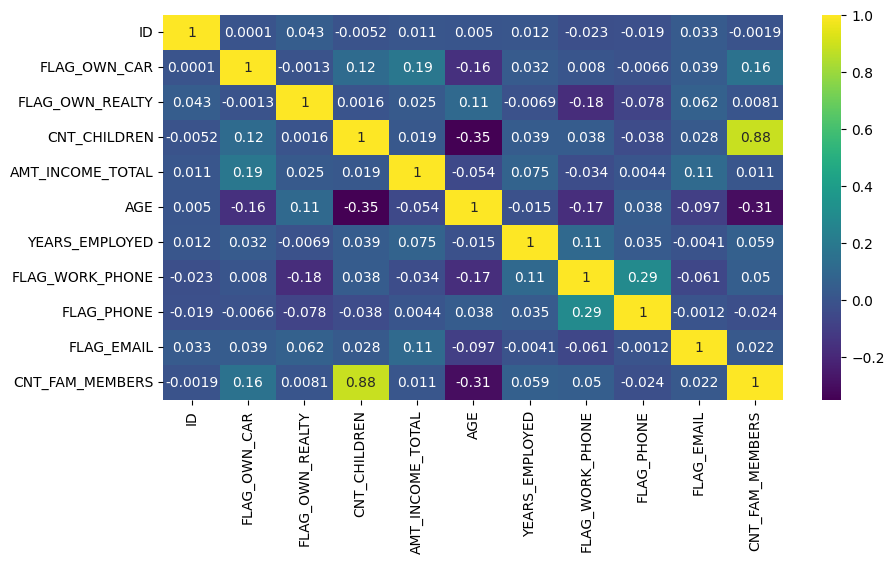

In [35]:
corr = df_registered.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [36]:
# Retirando 'CNT_CHILDREN' porque 'CNT_FAM_MEMBERS' também expressa essa informação (alta correlação)
df_registered = df_registered[['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',  'OCCUPATION_TYPE']]


In [37]:
df_registered.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


### Variáveis qualitativas

In [38]:
print(df_registered['NAME_INCOME_TYPE'].value_counts(normalize=True)*100)

NAME_INCOME_TYPE
Working                 51.557144
Commercial associate    22.972520
Pensioner               17.214223
State servant            8.252236
Student                  0.003877
Name: proportion, dtype: float64


In [39]:
print (df_registered['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100)

NAME_EDUCATION_TYPE
Secondary / secondary special    68.821314
Higher education                 26.797928
Incomplete higher                 3.385690
Lower secondary                   0.923909
Academic degree                   0.071158
Name: proportion, dtype: float64


In [40]:
print(df_registered['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100)

NAME_FAMILY_STATUS
Married                 68.367912
Single / not married    12.601976
Civil marriage           8.329323
Separated                6.214663
Widow                    4.486125
Name: proportion, dtype: float64


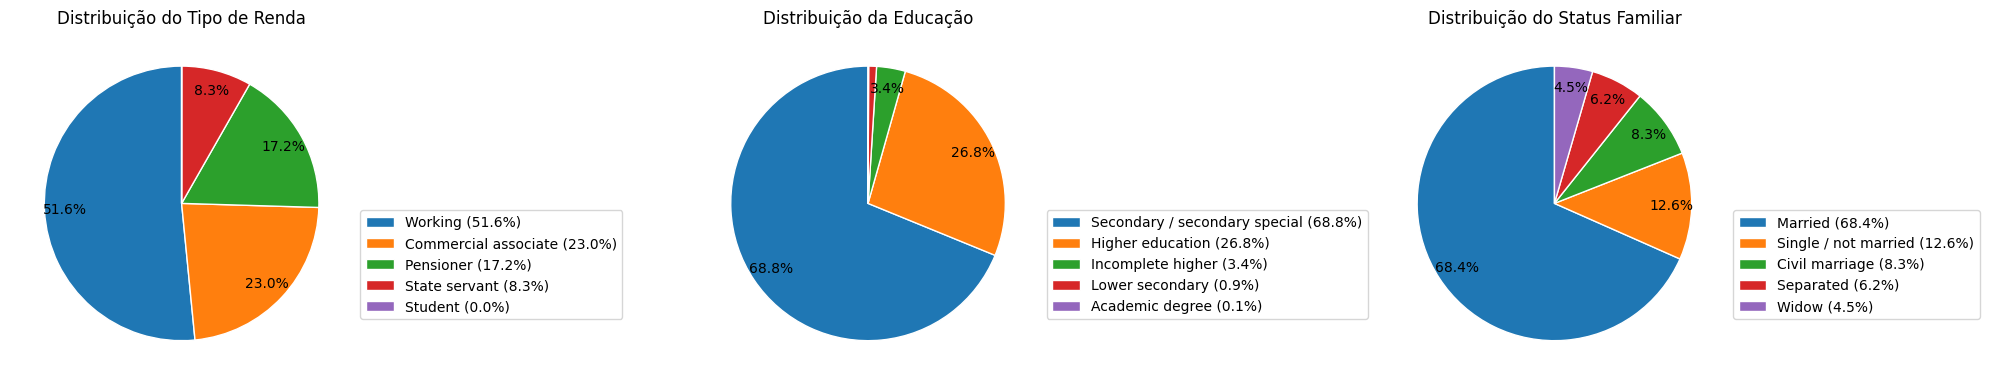

In [41]:
def func(pct):
    return f'{pct:.1f}%' if pct > 3 else ''

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for ax, data, title in zip(
    axes,
    [df_registered['NAME_INCOME_TYPE'].value_counts(),
     df_registered['NAME_EDUCATION_TYPE'].value_counts(),
     df_registered['NAME_FAMILY_STATUS'].value_counts()],
    ['Distribuição do Tipo de Renda', 'Distribuição da Educação', 'Distribuição do Status Familiar']
):
    ax.pie(
        data,
        autopct=func,
        startangle=90,
        labels=None,
        wedgeprops={'edgecolor': 'w'},
        pctdistance=0.85
    )
    ax.set_title(title)
    labels = [f'{k} ({v:.1f}%)' for k, v in zip(data.index, data / data.sum() * 100)]
    ax.legend(labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [42]:
housing_type_plot = df_registered['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100
occupation_plot = df_registered['OCCUPATION_TYPE'].value_counts(normalize=True)*100

print (housing_type_plot)
print(occupation_plot)


NAME_HOUSING_TYPE
House / apartment      89.801876
With parents            4.349740
Municipal apartment     3.241094
Rented apartment        1.362259
Office apartment        0.894032
Co-op apartment         0.350999
Name: proportion, dtype: float64
OCCUPATION_TYPE
Other                    30.601670
Laborers                 17.840730
Core staff                9.805388
Sales staff               9.371828
Managers                  8.091219
Drivers                   5.949191
High skill tech staff     3.941724
Accountants               3.644549
Medicine staff            3.083042
Cooking staff             1.841432
Security staff            1.822959
Cleaning staff            1.332610
Private service staff     0.787980
Low-skill Laborers        0.488069
Secretaries               0.466174
Waiters/barmen staff      0.379736
Realty agents             0.237420
HR staff                  0.176526
IT staff                  0.137754
Name: proportion, dtype: float64


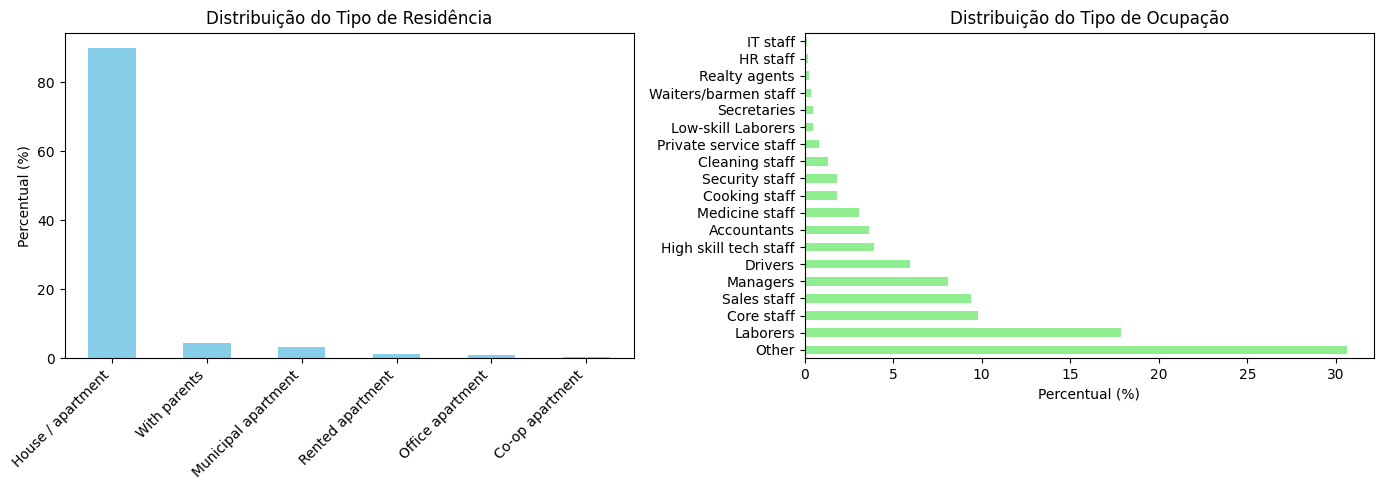

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: housing type
housing_type_plot.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xticklabels(housing_type_plot.index, rotation=45, ha='right')
axes[0].set_xlabel('')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_title('Distribuição do Tipo de Residência')

# Gráfico 2: occupation type
occupation_plot.plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_xlabel('Percentual (%)')
axes[1].set_ylabel('')
axes[1].set_title('Distribuição do Tipo de Ocupação')

plt.tight_layout()
plt.show()

### Variáveis quantitativas

In [44]:
df_registered[['CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AGE', 'YEARS_EMPLOYED']].describe()

,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


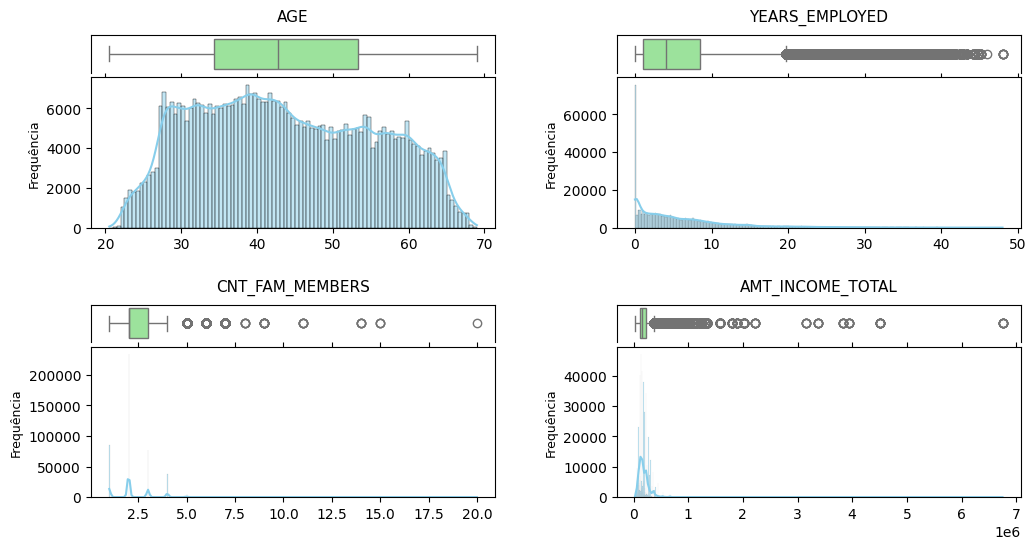

In [45]:
from matplotlib.gridspec import GridSpec


vars_quant = ['AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL']

fig = plt.figure(figsize=(12, 6))  # Aumenta a largura da figura para alongar os gráficos

# Grid externo 2x2
outer_gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

for i, var in enumerate(vars_quant):
    row = i // 2
    col = i % 2

    inner_gs = outer_gs[row, col].subgridspec(2, 1, height_ratios=[1, 4], hspace=0.05)

    ax_box = fig.add_subplot(inner_gs[0])
    sns.boxplot(x=df_registered[var], ax=ax_box, color='lightgreen', orient='h')
    ax_box.set(xlabel='', yticks=[])
    ax_box.spines['bottom'].set_visible(False)
    plt.setp(ax_box.get_xticklabels(), visible=False)

    ax_dist = fig.add_subplot(inner_gs[1], sharex=ax_box)
    sns.histplot(df_registered[var], kde=True, ax=ax_dist, color='skyblue')
    ax_dist.set_ylabel('Frequência', fontsize=9)
    ax_dist.set_xlabel('')
    ax_box.set_title(f'{var}', fontsize=11, pad=10)

plt.tight_layout()
plt.show()

#### Tratamento de Outliers

In [46]:
'''Técnica para remoção de outliers a partir de um intervalo de confiança
o valor +- o desvio-padrão'''

coluna = df_registered['AMT_INCOME_TOTAL']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items(): 
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [47]:
df_registered_s_outliers = df_registered.drop(index_outliers)
df_registered_s_outliers.shape

(425822, 15)

In [48]:
df1 = df_registered_s_outliers
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425822 entries, 2 to 438556
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   425822 non-null  int64  
 1   FLAG_OWN_CAR         425822 non-null  int64  
 2   FLAG_OWN_REALTY      425822 non-null  int64  
 3   FLAG_WORK_PHONE      425822 non-null  int64  
 4   FLAG_PHONE           425822 non-null  int64  
 5   FLAG_EMAIL           425822 non-null  int64  
 6   CNT_FAM_MEMBERS      425822 non-null  float64
 7   AMT_INCOME_TOTAL     425822 non-null  float64
 8   AGE                  425822 non-null  float64
 9   YEARS_EMPLOYED       425822 non-null  float64
 10  NAME_INCOME_TYPE     425822 non-null  object 
 11  NAME_EDUCATION_TYPE  425822 non-null  object 
 12  NAME_FAMILY_STATUS   425822 non-null  object 
 13  NAME_HOUSING_TYPE    425822 non-null  object 
 14  OCCUPATION_TYPE      425822 non-null  object 
dtypes: float64(4), int64(6

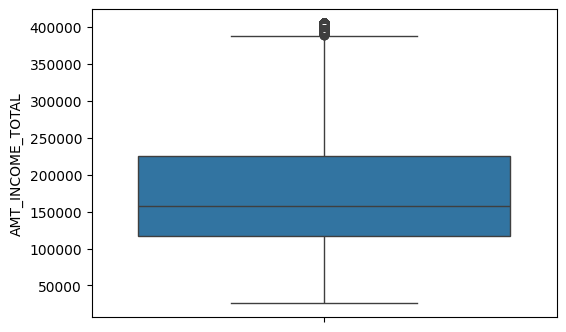

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_registered_s_outliers, y='AMT_INCOME_TOTAL') 
plt.xticks(rotation=45)
plt.show()

In [93]:
df_registered_s_outliers['AMT_INCOME_TOTAL'].max()

np.float64(405000.0)

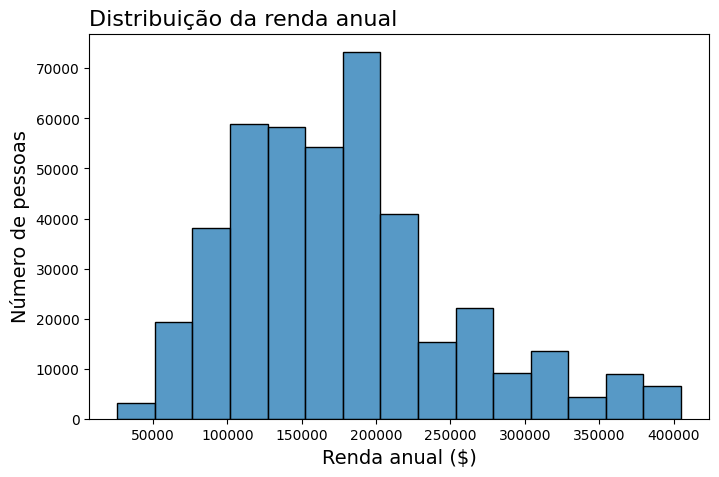

In [53]:
fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=df_registered_s_outliers, x='AMT_INCOME_TOTAL', bins=15)
plt.xticks(rotation=360)
ax.set_title('Distribuição da renda anual', fontsize = 16, loc='left')
ax.set_ylabel('Número de pessoas', fontsize = 14)
ax.set_xlabel('Renda anual ($)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
plt.show()

In [54]:
df1 = df_registered_s_outliers
df1.shape

(425822, 15)

## Variável Target

In [52]:
df_credit = pd.read_csv('../data/credit_record.csv')

In [53]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [54]:
df_credit['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [ ]:
df_credit['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

- MONTHS_BALANCE: mês em que o empréstimo foi concedido  
 0: mês atual   
-1: mês anterior  
-2: dois meses antes  
...
- STATUS:  
X: nenhum empréstimo  
C: pagamento realizado  
0: 1-29 days past due  
1: 30-59 days past due  
2: 60-89 days overdue  
3: 90-119 days overdue  
4: 120-149 days overdue  
5: Overdue or bad debts,

In [ ]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [55]:
# Analisando 1 cliente
df_credit.query('ID == 5001712') 
     

,ID,MONTHS_BALANCE,STATUS
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C
10,5001712,-6,C
11,5001712,-7,C
12,5001712,-8,C
13,5001712,-9,0


Nota-se que: nos últimos 8 meses, efetuou o pagamento em dia, mas nos primeiros 10 meses teve atraso de até 29 dias

In [56]:
# Analisando outro cliente
df_credit.query('ID == 5001711') 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0


O empréstimo dele só durou 3 meses, já quitou (X), mas teve atraso em todos os meses

In [ ]:
df_credit['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE